In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from src.napsu_mq.dataframe_data import DataFrameData
from src.napsu_mq.mst import MST_selection, Domain, Dataset
from src.napsu_mq.marginal_query import FullMarginalQuerySet
from src.utils.query_utils import calculate_query_number

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")

In [4]:
%%capture

def calculate_canonical_queries(data, epsilon, column_feature_set=[]):
    dataframe = DataFrameData(data)
    n, d = dataframe.int_array.shape
    delta = (n ** (-2))
    domain_key_list = list(dataframe.values_by_col.keys())
    domain_value_count_list = [len(dataframe.values_by_col[key]) for key in domain_key_list]

    domain = Domain(domain_key_list, domain_value_count_list)

    query_sets = MST_selection(Dataset(dataframe.int_df, domain), epsilon, delta,
                                   cliques_to_include=column_feature_set)

    queries = FullMarginalQuerySet(query_sets, dataframe.values_by_col)
    query_list = queries.flatten()
    queries = queries.get_canonical_queries()
    query_number = calculate_query_number(queries.queries)
    return query_number

In [5]:
def create_dummy_dataset(n_categories, n_columns, n_rows):
    dataframe = []

    for i in range(n_columns):
        column = np.round(np.random.uniform(1, n_categories, size=n_rows)).astype(int)
        dataframe.append(column)

    df = pd.DataFrame.from_records(dataframe).T.astype("category")

    # Columns are N first capital letters based on n_columns
    columns = [chr(i) for i in range(65, 65 + n_columns)]

    df.columns = columns
    
    return df

In [6]:
df = create_dummy_dataset(n_categories=10, n_columns=5, n_rows=10000)

In [7]:
df

,A,B,C,D,E
0,7,7,9,9,3
1,5,7,2,8,9
2,7,3,6,3,2
3,9,2,2,10,8
4,4,7,5,4,7
...,...,...,...,...,...
9995,7,3,6,4,2
9996,6,5,6,9,6
9997,5,8,6,8,3
9998,7,4,8,2,1


In [8]:
%%capture --no-display --no-stdout
query_data = []

for n_cols in range(2, 20):
    for n_cats in range(2, 20):
        print(f"Calculating canonical queries with {n_cols} columns and {n_cats} categories")
        df = create_dummy_dataset(n_categories=n_cats, n_columns=n_cols, n_rows=10000)
        query_num = calculate_canonical_queries(df, 1)
        query_data.append([n_cols, n_cats, query_num])

Calculating canonical queries with 2 columns and 2 categories
Calculating canonical queries, clique_set length: 4
Calculating new queries, not_original_clique_queries length: 2
Calculating canonical queries with 2 columns and 3 categories
Calculating canonical queries, clique_set length: 4
Calculating new queries, not_original_clique_queries length: 4
Calculating canonical queries with 2 columns and 4 categories
Calculating canonical queries, clique_set length: 4
Calculating new queries, not_original_clique_queries length: 6
Calculating canonical queries with 2 columns and 5 categories
Calculating canonical queries, clique_set length: 4
Calculating new queries, not_original_clique_queries length: 8
Calculating canonical queries with 2 columns and 6 categories
Calculating canonical queries, clique_set length: 4
Calculating new queries, not_original_clique_queries length: 10
Calculating canonical queries with 2 columns and 7 categories
Calculating canonical queries, clique_set length: 4


Calculating canonical queries with 4 columns and 12 categories
Calculating canonical queries, clique_set length: 8
Calculating new queries, not_original_clique_queries length: 44
Calculating canonical queries with 4 columns and 13 categories
Calculating canonical queries, clique_set length: 8
Calculating new queries, not_original_clique_queries length: 48
Calculating canonical queries with 4 columns and 14 categories
Calculating canonical queries, clique_set length: 8
Calculating new queries, not_original_clique_queries length: 52
Calculating canonical queries with 4 columns and 15 categories
Calculating canonical queries, clique_set length: 8
Calculating new queries, not_original_clique_queries length: 56
Calculating canonical queries with 4 columns and 16 categories
Calculating canonical queries, clique_set length: 8
Calculating new queries, not_original_clique_queries length: 60
Calculating canonical queries with 4 columns and 17 categories
Calculating canonical queries, clique_set 

Calculating canonical queries with 7 columns and 4 categories
Calculating canonical queries, clique_set length: 14
Calculating new queries, not_original_clique_queries length: 21
Calculating canonical queries with 7 columns and 5 categories
Calculating canonical queries, clique_set length: 14
Calculating new queries, not_original_clique_queries length: 28
Calculating canonical queries with 7 columns and 6 categories
Calculating canonical queries, clique_set length: 14
Calculating new queries, not_original_clique_queries length: 35
Calculating canonical queries with 7 columns and 7 categories
Calculating canonical queries, clique_set length: 14
Calculating new queries, not_original_clique_queries length: 42
Calculating canonical queries with 7 columns and 8 categories
Calculating canonical queries, clique_set length: 14
Calculating new queries, not_original_clique_queries length: 49
Calculating canonical queries with 7 columns and 9 categories
Calculating canonical queries, clique_set l

Calculating new queries, not_original_clique_queries length: 396
Calculating canonical queries with 9 columns and 14 categories
Calculating canonical queries, clique_set length: 18
Calculating new queries, not_original_clique_queries length: 455
Calculating canonical queries with 9 columns and 15 categories
Calculating canonical queries, clique_set length: 18
Calculating new queries, not_original_clique_queries length: 126
Calculating canonical queries with 9 columns and 16 categories
Calculating canonical queries, clique_set length: 18
Calculating new queries, not_original_clique_queries length: 360
Calculating canonical queries with 9 columns and 17 categories
Calculating canonical queries, clique_set length: 18
Calculating new queries, not_original_clique_queries length: 656
Calculating canonical queries with 9 columns and 18 categories
Calculating canonical queries, clique_set length: 18
Calculating new queries, not_original_clique_queries length: 442
Calculating canonical queries 

Calculating canonical queries with 12 columns and 5 categories
Calculating canonical queries, clique_set length: 24
Calculating new queries, not_original_clique_queries length: 128
Calculating canonical queries with 12 columns and 6 categories
Calculating canonical queries, clique_set length: 24
Calculating new queries, not_original_clique_queries length: 185
Calculating canonical queries with 12 columns and 7 categories
Calculating canonical queries, clique_set length: 24
Calculating new queries, not_original_clique_queries length: 288
Calculating canonical queries with 12 columns and 8 categories
Calculating canonical queries, clique_set length: 24
Calculating new queries, not_original_clique_queries length: 280
Calculating canonical queries with 12 columns and 9 categories
Calculating canonical queries, clique_set length: 24
Calculating new queries, not_original_clique_queries length: 288
Calculating canonical queries with 12 columns and 10 categories
Calculating canonical queries, 

Calculating canonical queries, clique_set length: 28
Calculating new queries, not_original_clique_queries length: 858
Calculating canonical queries with 14 columns and 15 categories
Calculating canonical queries, clique_set length: 28
Calculating new queries, not_original_clique_queries length: 784
Calculating canonical queries with 14 columns and 16 categories
Calculating canonical queries, clique_set length: 28
Calculating new queries, not_original_clique_queries length: 885
Calculating canonical queries with 14 columns and 17 categories
Calculating canonical queries, clique_set length: 28
Calculating new queries, not_original_clique_queries length: 480
Calculating canonical queries with 14 columns and 18 categories
Calculating canonical queries, clique_set length: 28
Calculating new queries, not_original_clique_queries length: 1394
Calculating canonical queries with 14 columns and 19 categories
Calculating canonical queries, clique_set length: 28
Calculating new queries, not_origina

Calculating new queries, not_original_clique_queries length: 132
Calculating canonical queries with 17 columns and 6 categories
Calculating canonical queries, clique_set length: 34
Calculating new queries, not_original_clique_queries length: 210
Calculating canonical queries with 17 columns and 7 categories
Calculating canonical queries, clique_set length: 34
Calculating new queries, not_original_clique_queries length: 354
Calculating canonical queries with 17 columns and 8 categories
Calculating canonical queries, clique_set length: 34
Calculating new queries, not_original_clique_queries length: 364
Calculating canonical queries with 17 columns and 9 categories
Calculating canonical queries, clique_set length: 34
Calculating new queries, not_original_clique_queries length: 584
Calculating canonical queries with 17 columns and 10 categories
Calculating canonical queries, clique_set length: 34
Calculating new queries, not_original_clique_queries length: 558
Calculating canonical queries

Calculating canonical queries with 19 columns and 15 categories
Calculating canonical queries, clique_set length: 38
Calculating new queries, not_original_clique_queries length: 1834
Calculating canonical queries with 19 columns and 16 categories
Calculating canonical queries, clique_set length: 38
Calculating new queries, not_original_clique_queries length: 2085
Calculating canonical queries with 19 columns and 17 categories
Calculating canonical queries, clique_set length: 38
Calculating new queries, not_original_clique_queries length: 1072
Calculating canonical queries with 19 columns and 18 categories
Calculating canonical queries, clique_set length: 38
Calculating new queries, not_original_clique_queries length: 1479
Calculating canonical queries with 19 columns and 19 categories
Calculating canonical queries, clique_set length: 38
Calculating new queries, not_original_clique_queries length: 2286


In [9]:
result_df = pd.DataFrame(query_data, columns=['n_cols', 'n_categories', 'query_num'])

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
result_df

,n_cols,n_categories,query_num
0,2,2,3
1,2,3,8
2,2,4,15
3,2,5,24
4,2,6,35
5,2,7,48
6,2,8,63
7,2,9,80
8,2,10,99
9,2,11,120


/tmp/ipykernel_778047/1201486032.py:1: UserWarning: The sizes list has more values (20) than needed (18), which may not be intended.
  g = sns.relplot(


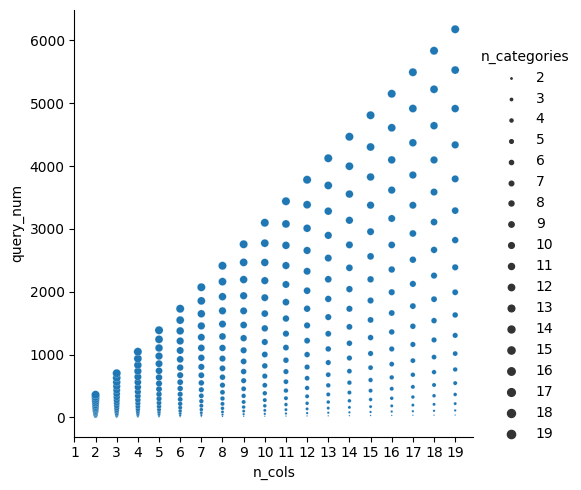

In [12]:
g = sns.relplot(
    data=result_df, x="n_cols", y="query_num",
    size="n_categories", sizes=list(range(1,40, 2))
)
plt.xticks(range(1, 20))
plt.show()

In [13]:
g.savefig(f"{PLOTS_FOLDER}/canonical_queries.pdf")

In [92]:
result_df.to_csv(f"{RESULTS_FOLDER}/canonical_query_number.csv")